<a href="https://colab.research.google.com/github/RitaRitaIsOOO/Parks_WO_Analysis/blob/master/parks_wo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Work Orders within NYC Parks Propeties**
The Asset Management Parks System (AMPS) is used by NYC Parks to track work completed by specialized staff or crews, including tradespeople. It also contains asset (primarily parks and structures) records and supplies associated with this work. Parks staff use AMPS to track their work as it is completed. 

There are 6 datasets that make up the AMPS system.  For this particular project 2 out of the 6 datasets will be used. 


In [1]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

print('import successful')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


import successful


# **Step 1: Loading Data**
Data was downloaded from NYC Open Data.


1.   **Work Order Dataset:** This is the primary table that tracks the work order decription, creation date, the start of the work and when work has been completed.  The primary key field is EVT_CODE. The EVT_OBJECT column can be joined to the Assets table on OBJ_CODE to know which asset the work order was for. 

2.   **Assets Dataset:** This data tracks the assests that the work order is attached to. Example of assests are buildings, parks, pieces of eqiupments, and maintanance districts. The primary key is OBJ_CODE. 

3. **Parks Properties:** Data displaying only the parks properties.  Data includes park names. The primary key is OMPPROPNUM column can be join to the Asset table on the OBJ_CODE column.





In [2]:
#Work Order Table
DPRwo_orig = pd.read_csv('https://data.cityofnewyork.us/api/views/8sdw-8vja/rows.csv?accessType=DOWNLOAD', index_col=None, na_values=['NA'],
sep=',',low_memory=False)
# Asset Table
DPRassets_orig = pd.read_csv('https://data.cityofnewyork.us/api/views/e25p-jzfy/rows.csv?accessType=DOWNLOAD', index_col=None, na_values=['NA'],
sep=',',low_memory=False)
#Parks Propety Table
parks_orig = pd.read_csv('https://data.cityofnewyork.us/api/views/enfh-gkve/rows.csv?accessType=DOWNLOAD', index_col=None, na_values=['NA'],
sep=',',low_memory=False)

#Checking if data was downloaded successfully. 
WO = DPRwo_orig.copy()
print('wo data loaded successfully')
asset = DPRassets_orig.copy()
print ('asset data loaded successfully')
parks = parks_orig.copy()
print ('parks properties data loaded succefully')

wo data loaded successfully
asset data loaded successfully
parks properties data loaded succefully


In [3]:
#check datatype of table
print(type(WO))
print(type(asset))
print(type(parks))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# **Step 2: Checking tables**

In [4]:
# Checking columns names and record count in each column
WO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560360 entries, 0 to 1560359
Data columns (total 56 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   EVT_CODE             1560360 non-null  int64  
 1   EVT_DESC             1560292 non-null  object 
 2   EVT_TYPE             1560360 non-null  object 
 3   EVT_DATE             1560360 non-null  object 
 4   EVT_MRC              1560360 non-null  object 
 5   EVT_PRINTED          1560360 non-null  object 
 6   EVT_OBTYPE           1560360 non-null  object 
 7   EVT_OBJECT           1560360 non-null  object 
 8   EVT_STANDWORK        907454 non-null   object 
 9   EVT_PPM              48005 non-null    object 
 10  EVT_FREQ             48712 non-null    float64
 11  EVT_ISSTYPE          1560360 non-null  object 
 12  EVT_CLASS            1044833 non-null  object 
 13  EVT_ROUTE            110190 non-null   object 
 14  EVT_TARGET           823639 non-null   object 
 15

In [5]:
# Checking columns names and record count in each column
asset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124268 entries, 0 to 124267
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   OBJ_OBTYPE         124268 non-null  object 
 1   OBJ_CODE           124268 non-null  object 
 2   OBJ_DESC           124268 non-null  object 
 3   OBJ_CLASS          84237 non-null   object 
 4   OBJ_CATEGORY       11190 non-null   object 
 5   OBJ_POSITION       1097 non-null    object 
 6   OBJ_PARENT         35890 non-null   object 
 7   OBJ_MANUFACT       4242 non-null    object 
 8   OBJ_MRC            124181 non-null  object 
 9   OBJ_SERIALNO       24065 non-null   object 
 10  OBJ_STATUS         124268 non-null  object 
 11  OBJ_COMMISS        124267 non-null  object 
 12  OBJ_WITHDRAW       46580 non-null   object 
 13  OBJ_RECORD         124268 non-null  object 
 14  OBJ_NOTUSED        85350 non-null   object 
 15  OBJ_MANUFACTMODEL  23936 non-null   object 
 16  OB

In [6]:
# Checking columns names and record count in each column
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ACQUISITIONDATE  1930 non-null   object 
 1   ACRES            2017 non-null   float64
 2   ADDRESS          1082 non-null   object 
 3   BOROUGH          2017 non-null   object 
 4   CLASS            2017 non-null   object 
 5   COMMISSIONDATE   1835 non-null   object 
 6   COMMUNITYBOARD   2017 non-null   object 
 7   COUNCILDISTRICT  2016 non-null   float64
 8   DEPARTMENT       2017 non-null   object 
 9   EAPPLY           1932 non-null   object 
 10  GISOBJID         2017 non-null   int64  
 11  GISPROPNUM       2017 non-null   object 
 12  GlobalID         2017 non-null   object 
 13  JURISDICTION     2017 non-null   object 
 14  LOCATION         2017 non-null   object 
 15  MAPPED           2011 non-null   object 
 16  NAME311          2016 non-null   object 
 17  NYS_ASSEMBLY  

# **Step 3. Joining Tables**

First Join - Work Order table to Asset Table

In [7]:
amps_merge = pd.merge(WO, asset, left_on='EVT_OBJECT', right_on='OBJ_CODE', how='inner')
amps = amps_merge
amps.head(3)

,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_MRC,EVT_PRINTED,EVT_OBTYPE,EVT_OBJECT,EVT_STANDWORK,EVT_PPM,EVT_FREQ,EVT_ISSTYPE,EVT_CLASS,EVT_ROUTE,EVT_TARGET,EVT_DURATION,EVT_PARENT,EVT_REQM,EVT_JOBTYPE,EVT_PRIORITY,EVT_REPORTED,EVT_START,EVT_DUE,EVT_COMPLETED,EVT_WARRANTY,EVT_SAFETY,EVT_REOPENED,EVT_SCHEDEND,EVT_CREATED,EVT_UPDATED,EVT_UPDATECOUNT,EVT_PERIODUOM,EVT_SQLIDENTITY,EVT_MULTIEQUIP,EVT_COMPLETED_TRUNC,EVT_UDFCHAR01,EVT_UDFCHAR02,EVT_UDFCHAR03,EVT_UDFCHAR04,EVT_UDFCHAR05,...,EVT_UDFCHAR13,EVT_UDFCHAR14,EVT_UDFCHAR15,EVT_UDFCHAR16,EVT_UDFNUM01,EVT_UDFNUM02,EVT_UDFCHKBOX01,EVT_UDFCHKBOX02,EVT_UDFCHKBOX03,EVT_UDFCHKBOX04,EVT_UDFCHKBOX05,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_CLASS,OBJ_CATEGORY,OBJ_POSITION,OBJ_PARENT,OBJ_MANUFACT,OBJ_MRC,OBJ_SERIALNO,OBJ_STATUS,OBJ_COMMISS,OBJ_WITHDRAW,OBJ_RECORD,OBJ_NOTUSED,OBJ_MANUFACTMODEL,OBJ_VALUE,OBJ_UPDATED,OBJ_UPDATECOUNT,OBJ_GISOBJID,OBJ_SQLIDENTITY,OBJ_GISLAYER,OBJ_XLOCATION,OBJ_YLOCATION,OBJ_UDFCHAR01,OBJ_UDFCHAR02,OBJ_UDFCHAR05,OBJ_UDFCHAR06,OBJ_CREATED
0,1698630,Rat Abatement,JOB,May 19 2018 8:58AM,M-03,-,S,M358-GT001,NaN,NaN,NaN,F,NaN,NaN,Jul 6 2018 12:00AM,26,NaN,NaN,GTBR,1-LOW,May 19 2018 8:58AM,NaN,NaN,NaN,-,-,-,Jul 31 2018 12:00AM,May 19 2018 9:31AM,Apr 11 2019 9:54AM,4,NaN,1671524,-,NaN,4. URG,NaN,GRNTHUMB,NaN,NaN,...,GT Open,NaN,NaN,NaN,NaN,NaN,+,-,-,+,-,S,M358-GT001,First Street Garden,GRNTHUMB,NaN,NaN,M358,NaN,M-03,NaN,I,Dec 18 2018 12:00AM,NaN,Apr 14 2020 2:20PM,-,NaN,NaN,Apr 14 2020 2:20PM,5,100041153.0,117356,Greenthumb,987131.93156,203054.141841,NaN,NaN,005 - Spanish/Chinese,NaN,Dec 18 2018 3:23PM
1,1833744,S M358-GT001 -V,IN,Dec 18 2018 3:23PM,M-03,-,S,M358-GT001,NaN,NaN,NaN,F,NaN,NaN,Dec 18 2018 12:00AM,1,NaN,NaN,NaN,NaN,Dec 18 2018 3:23PM,NaN,NaN,Dec 18 2018 3:23PM,-,-,-,Dec 18 2018 12:00AM,Dec 18 2018 3:23PM,NaN,1,NaN,1787928,-,Dec 18 2018 12:00AM,NaN,NaN,NaN,NaN,NaN,...,Completed,NaN,NaN,NaN,NaN,NaN,-,-,-,-,-,S,M358-GT001,First Street Garden,GRNTHUMB,NaN,NaN,M358,NaN,M-03,NaN,I,Dec 18 2018 12:00AM,NaN,Apr 14 2020 2:20PM,-,NaN,NaN,Apr 14 2020 2:20PM,5,100041153.0,117356,Greenthumb,987131.93156,203054.141841,NaN,NaN,005 - Spanish/Chinese,NaN,Dec 18 2018 3:23PM
2,1834058,S M358-GT001 --> S M358,AA,Dec 18 2018 3:53PM,M-03,-,S,M358-GT001,NaN,NaN,NaN,F,NaN,NaN,Dec 18 2018 12:00AM,1,NaN,NaN,NaN,NaN,Dec 18 2018 3:53PM,NaN,NaN,Dec 18 2018 3:53PM,-,-,-,Dec 18 2018 12:00AM,Dec 18 2018 3:53PM,NaN,1,NaN,1788242,-,Dec 18 2018 12:00AM,NaN,NaN,NaN,NaN,NaN,...,Completed,NaN,NaN,NaN,NaN,NaN,-,-,-,-,-,S,M358-GT001,First Street Garden,GRNTHUMB,NaN,NaN,M358,NaN,M-03,NaN,I,Dec 18 2018 12:00AM,NaN,Apr 14 2020 2:20PM,-,NaN,NaN,Apr 14 2020 2:20PM,5,100041153.0,117356,Greenthumb,987131.93156,203054.141841,NaN,NaN,005 - Spanish/Chinese,NaN,Dec 18 2018 3:23PM


* Second Join - First join table(amps_merge) to Parks property table
* This join will give the names of the assest, which are the park properties. 

In [8]:
parks_amps_merge = pd.merge(amps, parks, left_on = 'EVT_OBJECT', right_on = 'OMPPROPID', how = 'inner')
parks_wo = parks_amps_merge
parks_wo.head(1)

,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_MRC,EVT_PRINTED,EVT_OBTYPE,EVT_OBJECT,EVT_STANDWORK,EVT_PPM,EVT_FREQ,EVT_ISSTYPE,EVT_CLASS,EVT_ROUTE,EVT_TARGET,EVT_DURATION,EVT_PARENT,EVT_REQM,EVT_JOBTYPE,EVT_PRIORITY,EVT_REPORTED,EVT_START,EVT_DUE,EVT_COMPLETED,EVT_WARRANTY,EVT_SAFETY,EVT_REOPENED,EVT_SCHEDEND,EVT_CREATED,EVT_UPDATED,EVT_UPDATECOUNT,EVT_PERIODUOM,EVT_SQLIDENTITY,EVT_MULTIEQUIP,EVT_COMPLETED_TRUNC,EVT_UDFCHAR01,EVT_UDFCHAR02,EVT_UDFCHAR03,EVT_UDFCHAR04,EVT_UDFCHAR05,...,OBJ_UDFCHAR02,OBJ_UDFCHAR05,OBJ_UDFCHAR06,OBJ_CREATED,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMISSIONDATE,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,GISPROPNUM,GlobalID,JURISDICTION,LOCATION,MAPPED,NAME311,NYS_ASSEMBLY,NYS_SENATE,OBJECTID,OMPPROPID,PARENTID,PERMIT,PERMITDISTRICT,PERMITPARENT,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,URL,US_CONGRESS,WATERFRONT,ZIPCODE,multipolygon
0,1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B-06,-,S,B559,NaN,NaN,NaN,F,NaN,NaN,Feb 1 2019 12:00AM,1,NaN,NaN,GTBR,NaN,Feb 1 2019 4:15PM,NaN,NaN,NaN,-,-,-,Feb 1 2019 12:00AM,Feb 1 2019 4:16PM,Feb 14 2019 9:41AM,1,NaN,1807410,-,NaN,3. HIGH,NaN,GRNTHUMB,NaN,NaN,...,NaN,001 - Spanish/French,NaN,NaN,2016-01-19 00:00:00.0000000,0.083,204 COLUMBIA STREET,B,PARK,2016-02-22 00:00:00.0000000,306,39.0,B-06,NaN,100024465,B559,F9E0F402-B606-4C84-87BD-982AD6C63003,DPR,Columbia St. bet. Sackett St. and De Graw St.,NaN,South Brooklyn Children's Garden,52,26.0,11889,B559,B-06,NaN,B-06,B-06,NaN,76.0,False,South Brooklyn Children's Garden,NaN,Garden,NaN,7.0,False,11231,MULTIPOLYGON (((-74.00273402302695 40.68521366...


Checking the final join table information.

In [9]:
parks_wo.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708810 entries, 0 to 708809
Columns: 121 entries, EVT_CODE to multipolygon
dtypes: bool(2), float64(13), int64(9), object(97)
memory usage: 650.3+ MB


Checking the column names

In [10]:
parks_wo.columns

Index(['EVT_CODE', 'EVT_DESC', 'EVT_TYPE', 'EVT_DATE', 'EVT_MRC',
       'EVT_PRINTED', 'EVT_OBTYPE', 'EVT_OBJECT', 'EVT_STANDWORK', 'EVT_PPM',
       ...
       'PRECINCT', 'RETIRED', 'SIGNNAME', 'SUBCATEGORY', 'TYPECATEGORY', 'URL',
       'US_CONGRESS', 'WATERFRONT', 'ZIPCODE', 'multipolygon'],
      dtype='object', length=121)

# **Step 4 - Cleaning Data**
* Listing only the columuns needed for anaylysis and checking final table



In [11]:
dpr_wo_final = parks_wo[['EVT_CODE','EVT_DESC', 'EVT_TYPE', 'EVT_DATE','EVT_OBJECT','EVT_START','EVT_COMPLETED','EVT_CREATED',
          'EVT_COMPLETED_TRUNC','OBJ_OBTYPE', 'OBJ_CODE', 'OBJ_DESC',
          'OBJ_XLOCATION', 'OBJ_YLOCATION','BOROUGH','COMMUNITYBOARD', 'COUNCILDISTRICT',
       'DEPARTMENT', 'GISPROPNUM','OMPPROPID','SIGNNAME', ]]

dpr_wo_final.columns
dpr_wo_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708810 entries, 0 to 708809
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   EVT_CODE             708810 non-null  int64  
 1   EVT_DESC             708770 non-null  object 
 2   EVT_TYPE             708810 non-null  object 
 3   EVT_DATE             708810 non-null  object 
 4   EVT_OBJECT           708810 non-null  object 
 5   EVT_START            296356 non-null  object 
 6   EVT_COMPLETED        701290 non-null  object 
 7   EVT_CREATED          708810 non-null  object 
 8   EVT_COMPLETED_TRUNC  701290 non-null  object 
 9   OBJ_OBTYPE           708810 non-null  object 
 10  OBJ_CODE             708810 non-null  object 
 11  OBJ_DESC             708810 non-null  object 
 12  OBJ_XLOCATION        708810 non-null  float64
 13  OBJ_YLOCATION        708810 non-null  float64
 14  BOROUGH              708810 non-null  object 
 15  COMMUNITYBOARD   

Setting 'EVT_CODE' as the table index. 

In [12]:
dpr_wo_final.set_index(['EVT_CODE'], drop=True, inplace=False).head(1)

,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_OBJECT,EVT_START,EVT_COMPLETED,EVT_CREATED,EVT_COMPLETED_TRUNC,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_XLOCATION,OBJ_YLOCATION,BOROUGH,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,GISPROPNUM,OMPPROPID,SIGNNAME
EVT_CODE,,,,,,,,,,,,,,,,,,,,
1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B559,NaN,NaN,Feb 1 2019 4:16PM,NaN,S,B559,South Brooklyn Children's Garden,983446.465505,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden


Adding Columns:
* Creating a 'year_create' and 'year_completed' column
* Seperating the year from the date columns
* So we can look at how many work orders have been created and completed each year.  

In [0]:
def convert_to_year(dt):
  return pd.to_datetime(dt).year

In [14]:
dpr_wo_final['year_create'] = dpr_wo_final['EVT_CREATED'].apply(convert_to_year)
dpr_wo_final.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_OBJECT,EVT_START,EVT_COMPLETED,EVT_CREATED,EVT_COMPLETED_TRUNC,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_XLOCATION,OBJ_YLOCATION,BOROUGH,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,GISPROPNUM,OMPPROPID,SIGNNAME,year_create
0,1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B559,NaN,NaN,Feb 1 2019 4:16PM,NaN,S,B559,South Brooklyn Children's Garden,983446.465505,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden,2019


In [15]:
dpr_wo_final['year_completed'] = dpr_wo_final['EVT_COMPLETED_TRUNC'].apply(convert_to_year)
dpr_wo_final.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,EVT_CODE,EVT_DESC,EVT_TYPE,EVT_DATE,EVT_OBJECT,EVT_START,EVT_COMPLETED,EVT_CREATED,EVT_COMPLETED_TRUNC,OBJ_OBTYPE,OBJ_CODE,OBJ_DESC,OBJ_XLOCATION,OBJ_YLOCATION,BOROUGH,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,GISPROPNUM,OMPPROPID,SIGNNAME,year_create,year_completed
0,1853327,DELIVERY of 30 c/y of soil/compost mix to Sout...,JOB,Feb 1 2019 4:15PM,B559,NaN,NaN,Feb 1 2019 4:16PM,NaN,S,B559,South Brooklyn Children's Garden,983446.465505,188936.088384,B,306,39.0,B-06,B559,B559,South Brooklyn Children's Garden,2019,NaN


Create csv file as back up. 

In [0]:
dpr_wo_final.to_csv('dpr_wo_final.csv')

# **Step 5 - Analysis**

---




# **Calculate the sum of created and completed work orders.**

In [17]:
print('number of work orders created:', dpr_wo_final['year_create'].notnull().sum())
print('number of work orders completed:', dpr_wo_final['year_completed'].notnull().sum())

number of work orders created: 708810
number of work orders completed: 701290


# **Distribution of Work Orders Histogram**


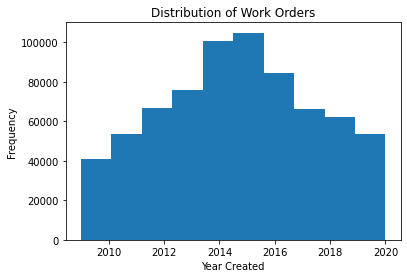

In [18]:
dpr_wo_final['year_create'].plot(kind='hist')
# set the title
plt.title('Distribution of Work Orders')

# add a label to the x-axis
plt.xlabel('Year Created')

plt.show()

# **Group By Tables**

Displaying Percent Work Orders Completed per Year


In [19]:
created_year = dpr_wo_final.groupby('year_create')['EVT_CODE'].count().rename('WO Created')
completed_year = dpr_wo_final.groupby('year_completed')['EVT_CODE'].count().rename('WO Completed')
percent_complete = (completed_year/created_year*100).rename('Percent Completed')

tot_wo_per_year = pd.concat([created_year,completed_year,percent_complete], axis=1)
tot_wo_per_year.round()

,WO Created,WO Completed,Percent Completed
2009.0,9160,6958,76.0
2010.0,31842,29705,93.0
2011.0,53742,50256,94.0
2012.0,66733,67590,101.0
2013.0,75680,75918,100.0
2014.0,100464,97866,97.0
2015.0,104823,105434,101.0
2016.0,84502,85549,101.0
2017.0,66022,66317,100.0
2018.0,62160,60746,98.0


# **Comparing Work Orders that have been created vs. completed through a 10 year period.**




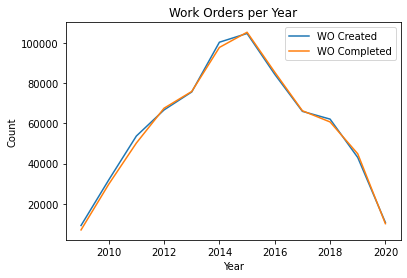

In [49]:
tot_wo_count_per_year = pd.concat([created_year,completed_year], axis=1)
tot_wo_count_per_year.round()

tot_wo_count_per_year.plot()

# Add a title
plt.title('Work Orders per Year')

# Add x- and y-axis labels
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()



# **Displaying Number of Work Orders by Year**



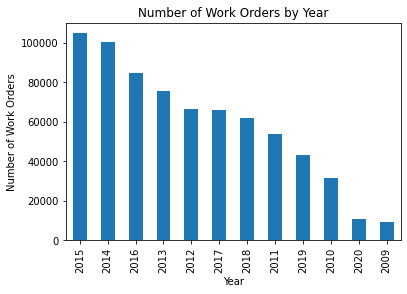

In [36]:
# Plot a count of movies per genre in a bar chart
dpr_wo_final['year_create'].value_counts().plot(kind='bar')

# Add title
plt.title('Number of Work Orders by Year')

# Customize x/y-axis label
plt.ylabel('Number of Work Orders')
plt.xlabel('Year')

plt.show()

# **Creating a table to look at total count of work orders created and completed by borough**

In [21]:
# Total Work Orders Created
created_boro = dpr_wo_final.groupby('BOROUGH')['year_create'].count().rename('Total Created')

# Total Work Orders Completed
completed_boro = dpr_wo_final.groupby('BOROUGH')['year_completed'].count().rename('Total Completed')


# Total count of work orders created/completed by Borough
tot_wo_per_boro = pd.concat([created_boro, completed_boro], axis=1)
tot_wo_per_boro.round().head()

,Total Created,Total Completed
BOROUGH,,
B,249096,245595
M,162343,160937
Q,147589,145952
R,34154,33781
X,115628,115025



> **Creating a Bar Chart to compare total count of work orders created and completed by borough**

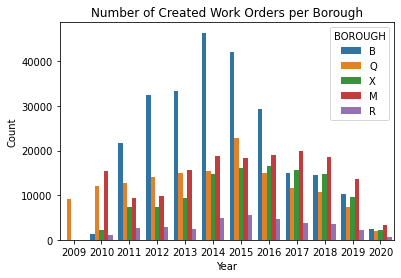

In [55]:
ax = sns.countplot(x="year_create", hue="BOROUGH", data=dpr_wo_final)
plt.title('Number of Created Work Orders per Borough')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

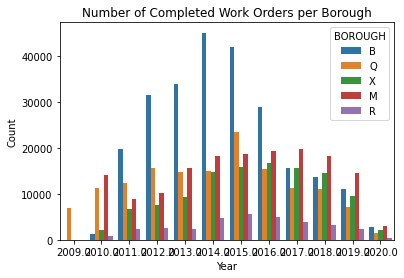

In [44]:
ax = sns.countplot(x=dpr_wo_final['year_completed'].dropna(), hue=dpr_wo_final['BOROUGH'])
plt.title('Number of Completed Work Orders per Borough')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

# **Looking at Work Orders Created in 2019**
* Issues:
    * Couldn't figure out how to ONLY show 2019 data
    * Rename the x axis labels to Other years/2019





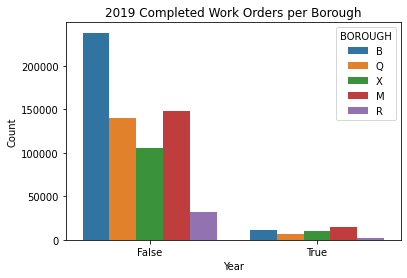

In [88]:
ax = sns.countplot(x=dpr_wo_final['year_completed'].isin([2019]), hue=dpr_wo_final['BOROUGH'])
plt.title('2019 Completed Work Orders per Borough')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

# **NYC Parks with the most work Orders**
* Issues:
    * Couldn't figure out how to eliminate Signname = Park from the bar chart as it obscures the data. 

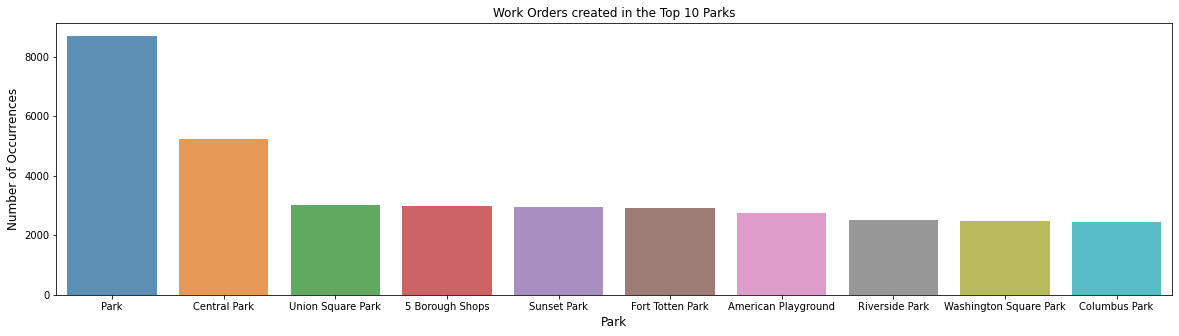

In [97]:
year_count  = dpr_wo_final['SIGNNAME'].value_counts()
year_count = year_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Work Orders created in the Top 10 Parks')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Park', fontsize=12)
plt.show()